In [8]:
import matplotlib as mpl

%config InlineBackend.figure_formats = ['svg']
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams.update({'mathtext.fontset': 'cm'})
mpl.rcParams.update({'axes.titlesize': 14})
mpl.rcParams.update({'axes.labelsize': 22})
mpl.rcParams.update({'axes.labelpad': 12})
mpl.rcParams.update({'axes.linewidth': 0.5})
mpl.rcParams.update({'xtick.labelsize': 10})
mpl.rcParams.update({'ytick.labelsize': 10})

import sys
import ode_solve as ode

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

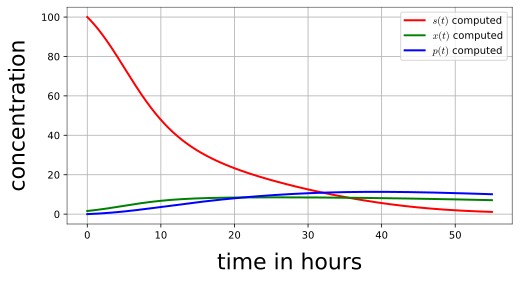

In [9]:
#Step 1- Define Parameters
F = 0.015
V = 1
Xmax = 9.577

T = 55  # Duration of experiment/simulation

#operation parameters from reference journal
Yps = 0.11
Ks = 34
umax = 0.41
Qmax = 1.33
 
h = 0.01            # Time step magnitude
t = np.arange(0.,T,h)  # Array of discrete times


# Step 2 - Define Rhs function for system of ODE's
def dy_dt(t, y):
    S = y[0] #let S(t) = y[0]
    X = y[1] #let X(t) = y[1]
    P = y[2] #let P(t) = y[2]
    
    #function that defines u(t)
    def u( t ):  return ( (umax * S) / (Ks + S) ) * ( 1 - (X/Xmax) )
    #system of ODE's
    dy_dt = np.array([ 
                        ((-1/Yps)*u(t)*X) + ((F/V)*X),
                        (u(t)*X) - ((F/V)*X),
                        (((Qmax * S)/(S + Ks))*(X/Xmax)) - ((F/V)*P) 
                    ])
    return dy_dt


#Step 3- Define Initial conditions
s0 = 100
x0 = 1.6
p0 = 0
y0 = [ s0, x0, p0 ]
#Call RK4
solRK4 = ode.RK4_ode_sys(dy_dt, t, y0)


#Step 4- Array of discrete times for plotting and analytical solution at these discrete times
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(t, solRK4[:, 0], linewidth=2, color='red', label='$s(t)$ computed')
ax.plot(t, solRK4[:, 1], linewidth=2, color='green', label='$x(t)$ computed')
ax.plot(t, solRK4[:, 2], linewidth=2, color='blue', label='$p(t)$ computed')
ax.set_xlabel('time in hours')
ax.set_ylabel('concentration')
ax.legend()
ax.grid()